In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns

## Detection of outliers

In [2]:
data=pd.read_csv(r"C:\Users\user\Desktop\dataframe\Solid_Waste_Generation_Recycling1.csv")
data

,Year,Agriculture,Aluminum Cans,Anti-freez,Appliance,"Ash,Sand",Asphalt,Batteries,Cardboard,Carpet,Cartons,Construct,Container,Container.1,Electronic,Fats and C,Ferrous M,Fluoresce,Food
0,2000,0,17944,2475,35427,10000,893218,10757,495470,97,98,376684,84062,NaN,255,0,357220,160,NaN
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,69,131922,81632,NaN,317,0,254104,346,NaN
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,26,131701,64937,NaN,1414,0,432778,417,NaN
3,2003,0,17608,4722,53353,10576,1600288,18780,430750,258,1789,143844,74126,NaN,3587,0,709881,772,NaN
4,2004,0,16010,8050,56920,40409,1783418,25518,535662,304,8,166325,81405,NaN,6568,0,866641,732,NaN
5,2005,0,15441,8767,47302,14588,2295278,28903,565698,186,4529,521087,82773,NaN,8534,0,974535,729,NaN
6,2006,0,14951,7507,49796,4008,2089972,25414,570802,897,5755,300820,90992,NaN,11386,97786,1048885,1063,NaN
7,2007,0,14005,7055,44667,2521,1510051,25734,555757,1193,5787,302089,96934,NaN,12325,116964,1009826,979,NaN
8,2008,31800,12842,6586,43401,0,2186429,25219,569688,3297,5475,339066,94077,NaN,17265,124289,1013552,1600,NaN
9,2009,45431,21098,5194,39777,344,2188200,21493,491266,3317,5526,302836,100823,NaN,22190,92345,998721,1229,NaN


In [3]:
# Let us keep original data into df1 for later use
df1=data

In [27]:
# Find out the no.of rows and columns in the data frame
data.shape

(15, 19)

## Outliers can be detected in 3 ways 

In [ ]:
# 1.Sorting
# 2.Ploting
# 3.IQR(inter quartile range)

## Sorting 

In [6]:
# Let us find outlier in Aluminum Cans by sorting that column
df=data.sort_values("Aluminum Cans")

In [7]:
df["Aluminum Cans"].head()

1     12540
2     12718
8     12842
11    13115
12    13635
Name: Aluminum Cans, dtype: int64

In [8]:
df["Aluminum Cans"].tail()

4     16010
13    16679
3     17608
0     17944
9     21098
Name: Aluminum Cans, dtype: int64

## Let us find outliers by drawing Graphs

<AxesSubplot:xlabel='Aluminum Cans'>

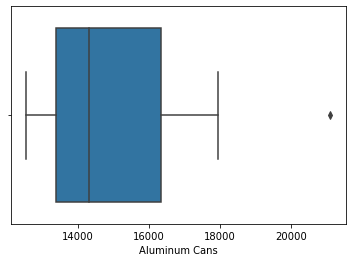

In [10]:
sns.boxplot(data=data,x="Aluminum Cans")

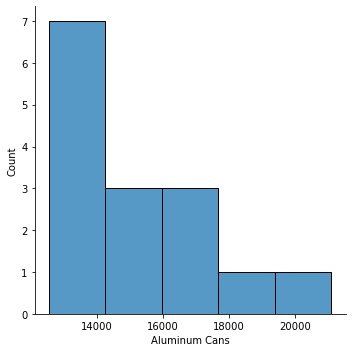

In [11]:
# Show the distribution plot
sns.displot(data=data,x="Aluminum Cans")

# Inter Quartile Range(IQR)

In [13]:
# 4parts or 4quartiles
# 25th percentile (Q1),50th percentile (Q2),75th percentile (Q3),100th percentile (Q4)
# the difference between Q3 and Q1 is called IQR
# IQR=Q3-Q1
# Quartile(0.75)
q3=data["Aluminum Cans"].quantile(0.75)
q3

16344.5

In [14]:
q1=data["Aluminum Cans"].quantile(0.25)
q1

13375.0

In [15]:
# we can find the IQR value by subtracting q1 value from q3
iqr=q3-q1
iqr

2969.5

In [16]:
# Valid upper limit is q3+one and half times of iqr i.e.,
u1=q3+(1.5*iqr)
u1

20798.75

In [17]:
# The value lower is q1-one and half times of iqr i.e.,
l1=q1-(1.5*iqr)
l1

8920.75

In [18]:
print(u1,l1)

20798.75 8920.75


## Handling Outliers

In [19]:
upper=np.where(data['Aluminum Cans']>=u1)
upper

(array([9], dtype=int64),)

In [20]:
lower=np.where(data['Aluminum Cans']<=l1)
lower

(array([], dtype=int64),)

In [29]:
data.drop(upper[0],inplace=True)
data

,Year,Agriculture,Aluminum Cans,Anti-freez,Appliance,"Ash,Sand",Asphalt,Batteries,Cardboard,Carpet,Cartons,Construct,Container,Container.1,Electronic,Fats and C,Ferrous M,Fluoresce,Food
0,2000,0,17944,2475,35427,10000,893218,10757,495470,97,98,376684,84062,NaN,255,0,357220,160,NaN
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,69,131922,81632,NaN,317,0,254104,346,NaN
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,26,131701,64937,NaN,1414,0,432778,417,NaN
3,2003,0,17608,4722,53353,10576,1600288,18780,430750,258,1789,143844,74126,NaN,3587,0,709881,772,NaN
4,2004,0,16010,8050,56920,40409,1783418,25518,535662,304,8,166325,81405,NaN,6568,0,866641,732,NaN
5,2005,0,15441,8767,47302,14588,2295278,28903,565698,186,4529,521087,82773,NaN,8534,0,974535,729,NaN
6,2006,0,14951,7507,49796,4008,2089972,25414,570802,897,5755,300820,90992,NaN,11386,97786,1048885,1063,NaN
7,2007,0,14005,7055,44667,2521,1510051,25734,555757,1193,5787,302089,96934,NaN,12325,116964,1009826,979,NaN
8,2008,31800,12842,6586,43401,0,2186429,25219,569688,3297,5475,339066,94077,NaN,17265,124289,1013552,1600,NaN
10,2010,55689,13655,4783,48881,20364,2211889,26986,471477,3867,2763,269603,109916,3212.0,25569,91050,1332254,1087,402.0


## Replacing Outliers

In [21]:
data1=pd.read_csv(r"C:\Users\user\Desktop\dataframe\Solid_Waste_Generation_Recycling1.csv")
data1

,Year,Agriculture,Aluminum Cans,Anti-freez,Appliance,"Ash,Sand",Asphalt,Batteries,Cardboard,Carpet,Cartons,Construct,Container,Container.1,Electronic,Fats and C,Ferrous M,Fluoresce,Food
0,2000,0,17944,2475,35427,10000,893218,10757,495470,97,98,376684,84062,NaN,255,0,357220,160,NaN
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,69,131922,81632,NaN,317,0,254104,346,NaN
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,26,131701,64937,NaN,1414,0,432778,417,NaN
3,2003,0,17608,4722,53353,10576,1600288,18780,430750,258,1789,143844,74126,NaN,3587,0,709881,772,NaN
4,2004,0,16010,8050,56920,40409,1783418,25518,535662,304,8,166325,81405,NaN,6568,0,866641,732,NaN
5,2005,0,15441,8767,47302,14588,2295278,28903,565698,186,4529,521087,82773,NaN,8534,0,974535,729,NaN
6,2006,0,14951,7507,49796,4008,2089972,25414,570802,897,5755,300820,90992,NaN,11386,97786,1048885,1063,NaN
7,2007,0,14005,7055,44667,2521,1510051,25734,555757,1193,5787,302089,96934,NaN,12325,116964,1009826,979,NaN
8,2008,31800,12842,6586,43401,0,2186429,25219,569688,3297,5475,339066,94077,NaN,17265,124289,1013552,1600,NaN
9,2009,45431,21098,5194,39777,344,2188200,21493,491266,3317,5526,302836,100823,NaN,22190,92345,998721,1229,NaN


In [23]:
# we will convert 'Aluminum Cans' values into an array using values attributes
arr=data1['Aluminum Cans'].values
arr

array([17944, 12540, 12718, 17608, 16010, 15441, 14951, 14005, 12842,
       21098, 13655, 13115, 13635, 16679, 14309], dtype=int64)

In [24]:
# All these values of array should be between the lower and upper limits. such
# Values are marked as True. Remaining values are False.(They are outliers)
true_index=(arr>l1)&(arr<u1)
true_index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True])

In [25]:
# Calculate median to replace 9th position (outlier) by median value of all true values.
mid=np.median(data1['Aluminum Cans'][true_index])
mid

14157.0

In [26]:
# To replace the outliers with median value, we have to replace the 
# false_index value
false_index=~true_index
data1['Aluminum Cans'].values[false_index]=mid
data1

,Year,Agriculture,Aluminum Cans,Anti-freez,Appliance,"Ash,Sand",Asphalt,Batteries,Cardboard,Carpet,Cartons,Construct,Container,Container.1,Electronic,Fats and C,Ferrous M,Fluoresce,Food
0,2000,0,17944,2475,35427,10000,893218,10757,495470,97,98,376684,84062,NaN,255,0,357220,160,NaN
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,69,131922,81632,NaN,317,0,254104,346,NaN
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,26,131701,64937,NaN,1414,0,432778,417,NaN
3,2003,0,17608,4722,53353,10576,1600288,18780,430750,258,1789,143844,74126,NaN,3587,0,709881,772,NaN
4,2004,0,16010,8050,56920,40409,1783418,25518,535662,304,8,166325,81405,NaN,6568,0,866641,732,NaN
5,2005,0,15441,8767,47302,14588,2295278,28903,565698,186,4529,521087,82773,NaN,8534,0,974535,729,NaN
6,2006,0,14951,7507,49796,4008,2089972,25414,570802,897,5755,300820,90992,NaN,11386,97786,1048885,1063,NaN
7,2007,0,14005,7055,44667,2521,1510051,25734,555757,1193,5787,302089,96934,NaN,12325,116964,1009826,979,NaN
8,2008,31800,12842,6586,43401,0,2186429,25219,569688,3297,5475,339066,94077,NaN,17265,124289,1013552,1600,NaN
9,2009,45431,14157,5194,39777,344,2188200,21493,491266,3317,5526,302836,100823,NaN,22190,92345,998721,1229,NaN
